In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

['C:\\Windows\\Fonts\\FELIXTI.TTF', 'C:\\Users\\yoon0\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Medium.otf', 'C:\\Windows\\Fonts\\GLSNECB.TTF', 'C:\\Windows\\Fonts\\PERI____.TTF', 'C:\\Windows\\Fonts\\STXINWEI.TTF', 'C:\\Windows\\Fonts\\JOKERMAN.TTF', 'C:\\Users\\yoon0\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf', 'C:\\Windows\\Fonts\\H2SA1M.TTF', 'C:\\Windows\\Fonts\\H2PORL.TTF', 'C:\\Windows\\Fonts\\msjhbd.ttc', 'C:\\Windows\\Fonts\\segoesc.ttf', 'C:\\Windows\\Fonts\\couri.ttf', 'C:\\Windows\\Fonts\\FRABK.TTF', 'C:\\Windows\\Fonts\\NanumSquareR.ttf', 'C:\\Windows\\Fonts\\BRLNSR.TTF', 'C:\\Windows\\Fonts\\YuGothM.ttc', 'C:\\Windows\\Fonts\\comici.ttf', 'C:\\Windows\\Fonts\\msjhl.ttc', 'C:\\Windows\\Fonts\\Gabriola.ttf', 'C:\\Windows\\Fonts\\HANWing2.ttf', 'C:\\Windows\\Fonts\\CALIFR.TTF', 'C:\\Windows\\Fonts\\HTOWERT.TTF', 'C:\\Windows\\Fonts\\ntailub.ttf', 'C:\\Windows\\Fonts\\PERB____.TTF', 'C:\\Windows\\Fonts\\SimsunExtG.ttf', 'C:\\Windows\\Fonts

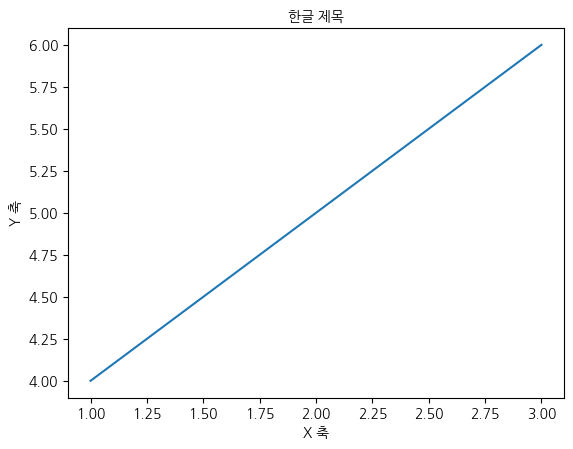

In [2]:
import matplotlib.font_manager as fm


# 나눔 폰트 경로 설정 (폰트를 설치한 위치를 확인하여 경로를 수정)
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'

# 폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=10)

# matplotlib에 폰트 설정
plt.rc('font', family=fontprop.get_name())

# 폰트 설정 확인
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

# 한글 텍스트가 포함된 예제 플롯
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 제목', fontproperties=fontprop)
plt.xlabel('X 축', fontproperties=fontprop)
plt.ylabel('Y 축', fontproperties=fontprop)
plt.show()

# 가설검정



In [3]:
df = pd.read_csv("./movie_finished_toFDA_V9.csv", encoding='utf-8')

In [4]:
teaser = pd.read_excel("./trailer_data/예고편 영상 데이터.xlsx")

In [5]:
# df랑 teaser 합쳐야하는데 movie_title을 기준으로 merge 해주고 df에 새로운 컬럼으로 teaser 중에 view_count 피쳐만 추가해주면 됨
merged_df = pd.merge(df, teaser[['movie_title', 'view_count']], on='movie_title', how='left')

# 결과 확인
print(merged_df.head())

   naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
0            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
1            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
2            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
3            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
4            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   

         Date       DoW      MoY  D_D  DailyTotal  ...  국적평균스크린수  등급평균관객수  \
0  2016-01-07  Thursday  January    0         612  ...        95     9090   
1  2016-01-08    Friday  January    1         332  ...        95     9090   
2  2016-01-09  Saturday  January    2         394  ...        95     9090   
3  2016-01-10    Sunday  January    3         205  ...        95     9090   
4  2016-01-11    Monday  January    4         246  ...        95     9090   

   등급평균누적관람객수  등급평균스크린수  7days_before  5days_before  Day_of_release 

In [7]:
import holidays

# 대한민국 공휴일 객체 생성 (2016년 ~ 2019년)
kr_holidays = holidays.KR(years=range(2016, 2020))

# Date 열을 datetime 형식으로 변환
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# 공휴일 여부 확인 및 Holiday 열 생성
merged_df['Holiday'] = merged_df['Date'].apply(lambda x: 1 if x in kr_holidays else 0)

# Weekend 열 생성: 토요일(Saturday)이나 일요일(Sunday)면 1, 아니면 0
merged_df['Weekend'] = merged_df['DoW'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Vacation 열 생성: 월이 1, 2, 7, 8이면 1, 아니면 0
merged_df['Vacation'] = merged_df['Date'].dt.month.apply(lambda x: 1 if x in [1, 2, 7, 8] else 0)

# 결과 확인
print(merged_df.head())


   naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
0            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
1            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
2            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
3            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   
4            107374          20142641   나를 잊지 말아요   2016-01-07    Thursday   

        Date       DoW      MoY  D_D  DailyTotal  ...  등급평균스크린수  7days_before  \
0 2016-01-07  Thursday  January    0         612  ...        79            11   
1 2016-01-08    Friday  January    1         332  ...        79            11   
2 2016-01-09  Saturday  January    2         394  ...        79            11   
3 2016-01-10    Sunday  January    3         205  ...        79            11   
4 2016-01-11    Monday  January    4         246  ...        79            11   

   5days_before  Day_of_release  5days_after

### Baseline Model

개봉일 관객수를 예측하기 위해서는 개봉 이전의 영화 데이터만을 사용해야한다.\
영화 산업의 특성상 영화의 인지도는 극단적인 불균형을 갖는다.\
관객수의 편차는 굉장히 높은 수준이고 예측에 있어서 어려운 점이다.

처음에는 관객수가 엄청 높거나 낮은 영화를 제외하고 모델을 구축하려 하였다.\
하지만 관객수가 높은 영화는 머신러닝 입장에서는 이상치이지만 영화사 입장에서는 가치있는 데이터이다.

결론적으로 이상치를 제거하지 않고 새로운 데이터(예고편 조회수)나 파생 변수(장르의 계절성)을 수집 및 생성하여 진행하였다.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
# D_D가 0인 데이터 추출
dd_zero_df = merged_df[merged_df['D_D'] == 0]

# 독립변수와 타겟 변수 정의
features = ['감독군', 'actor_power', '장르평균관객수', '배급사군', 'running_time', 'view_count', 'Holiday', 'Weekend', 'Vacation']
target = '관객수'

# 데이터 분리
X = dd_zero_df[features]
y = dd_zero_df[target]

# 결측치 처리 (단순 삭제)
X = X.dropna()
y = y.loc[X.index]

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 여러 모델 정의
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'SVR': SVR()
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R^2': r2}

# 결과 출력
for name, metrics in results.items():
    print(f"{name} - MAE: {metrics['MAE']:.2f}, R^2: {metrics['R^2']:.2f}")


RandomForest - MAE: 72087.28, R^2: 0.37
GradientBoosting - MAE: 79997.00, R^2: 0.22
LinearRegression - MAE: 70754.64, R^2: 0.54
SVR - MAE: 96287.82, R^2: -0.14


### 파생 변수: 장르의 계절성

계절별로 장르의 특징이 있는지 확인

In [9]:
# D_D가 0일인 행만 추출
df_0 = df[df['D_D'] == 0].copy()

# genre 컬럼을 쉼표(',')로 split한 뒤 첫 번째 값을 추출하여 새로운 컬럼 생성
df_0['first_genre'] = df_0['genre'].str.split(',').str[0]

print(df_0)

      naver_movie_code  kobis_movie_code                     movie_title  \
0               107374          20142641                       나를 잊지 말아요   
15              137281          20150024  짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격   
30              109910          20155422                           굿 다이노   
45               62285          20068576                         그날의 분위기   
60              124212          20154001                레버넌트: 죽음에서 돌아온 자   
...                ...               ...                             ...   
6060            179125          20198453                 롱 리브 더 킹: 목포 영웅   
6075            101966          20184047                        토이 스토리 4   
6090            179875          20182585                             비스트   
6105            181698          20196655                     존 윅 3: 파라벨룸   
6120            183850          20199951                         애나벨 집으로   

     release_date DoW_release        Date        DoW      MoY  D_D  \
0      2016-01-07

In [10]:
df_0['first_genre'].value_counts()

first_genre
액션        94
드라마       86
애니메이션     66
범죄        27
코미디       22
공포(호러)    21
스릴러       19
멜로/로맨스    16
어드벤처      12
미스터리      11
판타지        9
SF         8
사극         8
다큐멘터리      6
가족         2
전쟁         1
공연         1
Name: count, dtype: int64

In [11]:
# 상위 장르 리스트 (기타로 묶지 않을 장르들)
main_genres = ['액션', '드라마', '애니메이션', '범죄', '코미디', '공포(호러)', '스릴러', '멜로/로맨스']

# main_genres에 없는 경우 '기타'로 매핑
df_0['first_genre'] = df_0['first_genre'].apply(lambda x: x if x in main_genres else '기타')

print(df_0)

      naver_movie_code  kobis_movie_code                     movie_title  \
0               107374          20142641                       나를 잊지 말아요   
15              137281          20150024  짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격   
30              109910          20155422                           굿 다이노   
45               62285          20068576                         그날의 분위기   
60              124212          20154001                레버넌트: 죽음에서 돌아온 자   
...                ...               ...                             ...   
6060            179125          20198453                 롱 리브 더 킹: 목포 영웅   
6075            101966          20184047                        토이 스토리 4   
6090            179875          20182585                             비스트   
6105            181698          20196655                     존 윅 3: 파라벨룸   
6120            183850          20199951                         애나벨 집으로   

     release_date DoW_release        Date        DoW      MoY  D_D  \
0      2016-01-07

In [12]:
     # 월별(MoY), 장르별(first_genre)로 그룹화하여 영화 개수와 관객수 합 구하기
result = (df_0
          .groupby(['MoY', 'first_genre'])
          .agg(movie_count=('movie_title', 'nunique'),   # 영화 개수 (동일 영화 제목 기준 고유 값 개수)
          audience_sum=('관객수', 'sum'))           # 관객수 합 (열 이름 '관객수' 가 있다고 가정)
          .reset_index()
     )

print(result)


          MoY first_genre  movie_count  audience_sum
0       April      공포(호러)            3         78335
1       April          기타            6        192885
2       April         드라마            7        314841
3       April      멜로/로맨스            1         24326
4       April         스릴러            1        155917
..        ...         ...          ...           ...
93  September      멜로/로맨스            1          9431
94  September          범죄            4        749281
95  September       애니메이션            4         32742
96  September          액션            6       1035806
97  September         코미디            3        292310

[98 rows x 4 columns]


영화 개수 그래프와 관객수 합 그래프를 하나의 그래프에 넣어, 두 특성이 비슷한 추세를 보이는지 확인

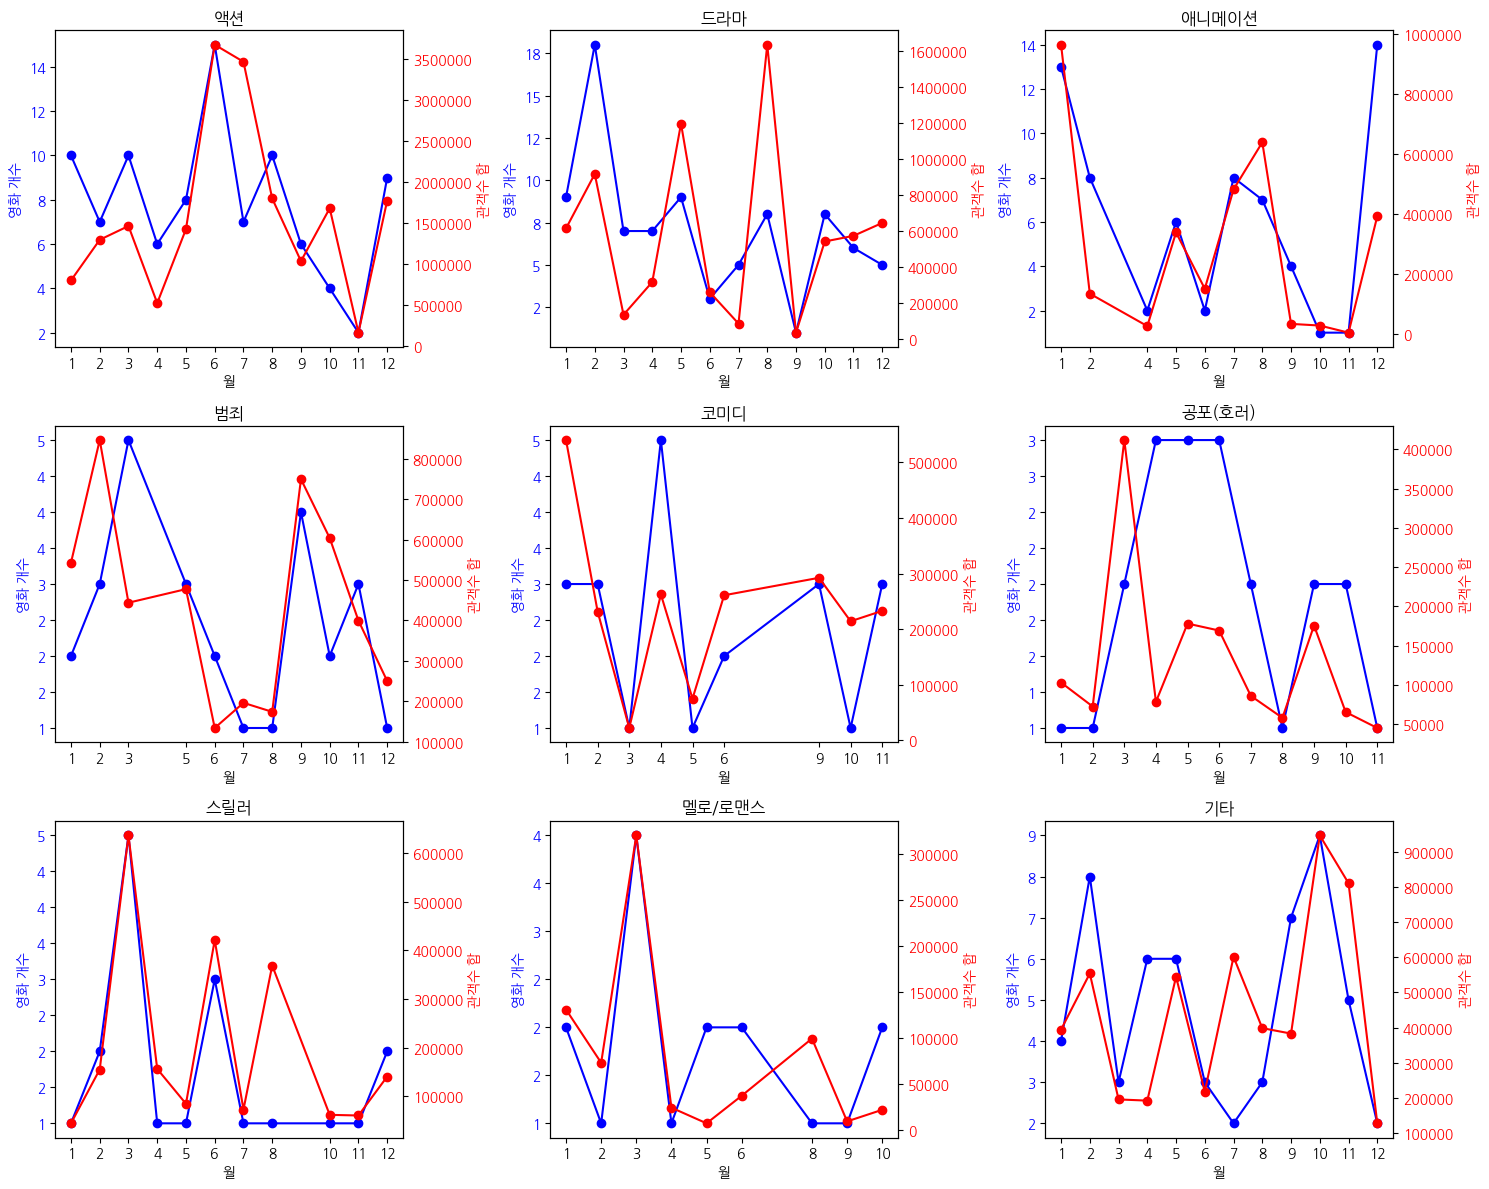

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

month_map = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

genres = ['액션', '드라마', '애니메이션', '범죄', '코미디', '공포(호러)', '스릴러', '멜로/로맨스', '기타']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for ax, genre in zip(axes, genres):
    genre_data = result[result['first_genre'] == genre].copy()
    
    # MoY 값을 소문자로 만들어서 매핑에 사용
    genre_data['MoY_num'] = genre_data['MoY'].str.lower().map(month_map)
    
    # MoY_num으로 정렬
    genre_data = genre_data.sort_values('MoY_num')

    moy_num = genre_data['MoY_num']
    movie_count = genre_data['movie_count']
    audience_sum = genre_data['audience_sum']
    
    # 왼쪽 축: movie_count
    ax.plot(moy_num, movie_count, color='blue', marker='o', label='Movie Count')
    ax.set_xlabel('월')
    ax.set_ylabel('영화 개수', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_title(f'{genre}')
    
    # x축 라벨을 숫자로 나타낼 때, 이미 moy_num이 숫자이므로 바로 사용
    ax.set_xticks(moy_num)
    ax.set_xticklabels(moy_num.astype(str))
    
    # y축을 정수로 표시 (왼쪽 축)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

    # 오른쪽 축: audience_sum
    ax2 = ax.twinx()
    ax2.plot(moy_num, audience_sum, color='red', marker='o', label='Audience Sum')
    ax2.set_ylabel('관객수 합', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # y축을 정수로 표시 (오른쪽 축)
    ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

plt.tight_layout()
plt.show()

장르별 scale 차이 확인하기 위해 시각화

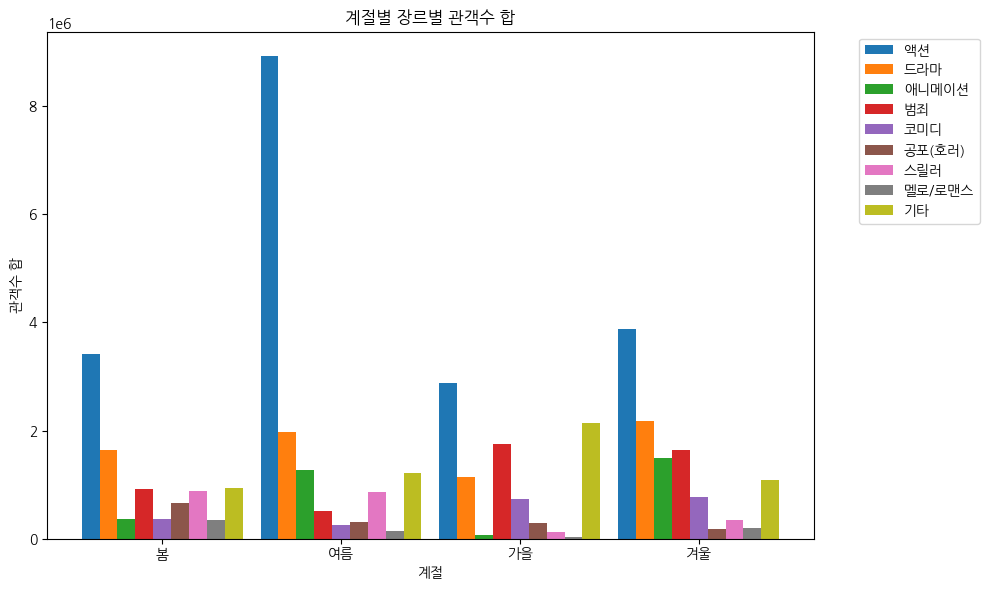

In [14]:


# 계절 매핑 함수
def get_season(month_num):
    if month_num in [3,4,5]:
        return '봄'
    elif month_num in [6,7,8]:
        return '여름'
    elif month_num in [9,10,11]:
        return '가을'
    else:
        return '겨울'

genres = ['액션', '드라마', '애니메이션', '범죄', '코미디', '공포(호러)', '스릴러', '멜로/로맨스', '기타']

# MoY를 숫자로 변환
df_0['MoY_num'] = df_0['MoY'].str.lower().map(month_map)

# 계절 컬럼 추가
df_0['season'] = df_0['MoY_num'].apply(get_season)

# 장르 외의 값은 '기타' 처리 (이미 처리되어 있다고 가정, 없으면 여기서 처리)
# df_0['first_genre'] = df_0['first_genre'].apply(lambda x: x if x in genres[:-1] else '기타')

# 계절별, 장르별 관객수 합 계산
season_genre_sum = df_0.groupby(['season', 'first_genre'])['관객수'].sum().unstack(fill_value=0)

# 시각화를 위한 데이터 준비
# season_genre_sum: index=season, columns=genre, values=sum 관객수
seasons_order = ['봄', '여름', '가을', '겨울']  # 계절 순서 지정
season_genre_sum = season_genre_sum.loc[seasons_order, genres]  # 지정한 순서 및 장르 리스트로 정렬

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# season별 x 위치
x = range(len(season_genre_sum.index))
width = 0.1  # 막대 폭
N = len(season_genre_sum.columns)  # 장르 개수

for i, genre in enumerate(season_genre_sum.columns):
    ax.bar([pos + i*width for pos in x], season_genre_sum[genre], width, label=genre)

ax.set_xticks([pos + (N-1)*width/2 for pos in x])
ax.set_xticklabels(season_genre_sum.index)

ax.set_xlabel('계절')
ax.set_ylabel('관객수 합')
ax.set_title('계절별 장르별 관객수 합')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

계절별 관객 수 합 시각화, 영화 수요 확인

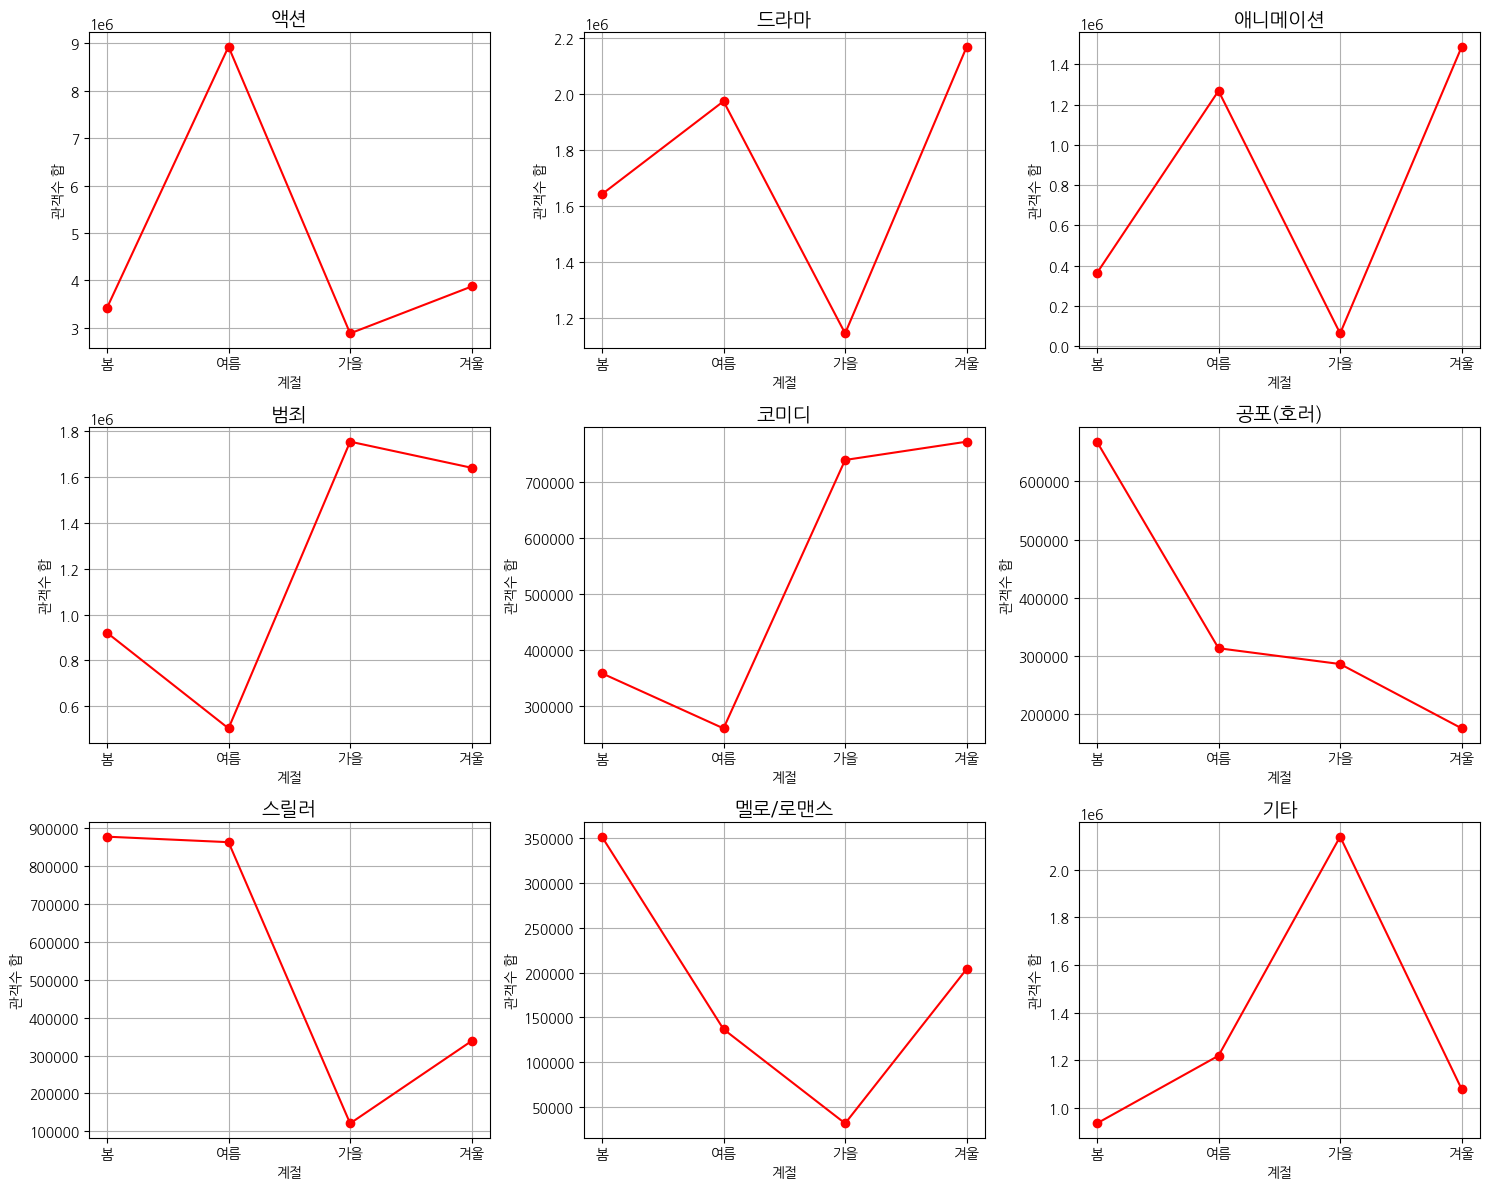

In [15]:
import matplotlib.pyplot as plt

# season_genre_sum: index=계절['봄','여름','가을','겨울'], columns=장르, values=관객수 합
# 계절 순서가 이미 ['봄','여름','가을','겨울'] 순으로 정렬되어 있다고 가정
seasons_order = ['봄', '여름', '가을', '겨울']
genres = ['액션', '드라마', '애니메이션', '범죄', '코미디', '공포(호러)', '스릴러', '멜로/로맨스', '기타']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for ax, genre in zip(axes, genres):
    # 해당 장르에 대한 계절별 관객수 데이터
    y_values = season_genre_sum[genre]
    
    ax.plot(seasons_order, y_values, marker='o', color='red', label=genre)
    ax.set_title(f'{genre}', fontsize=14)
    ax.set_xlabel('계절')
    ax.set_ylabel('관객수 합')
    ax.grid(True)

plt.tight_layout()
plt.show()


계절별 영화 개수 시각화, 제작사 입장에서의 전략 확인

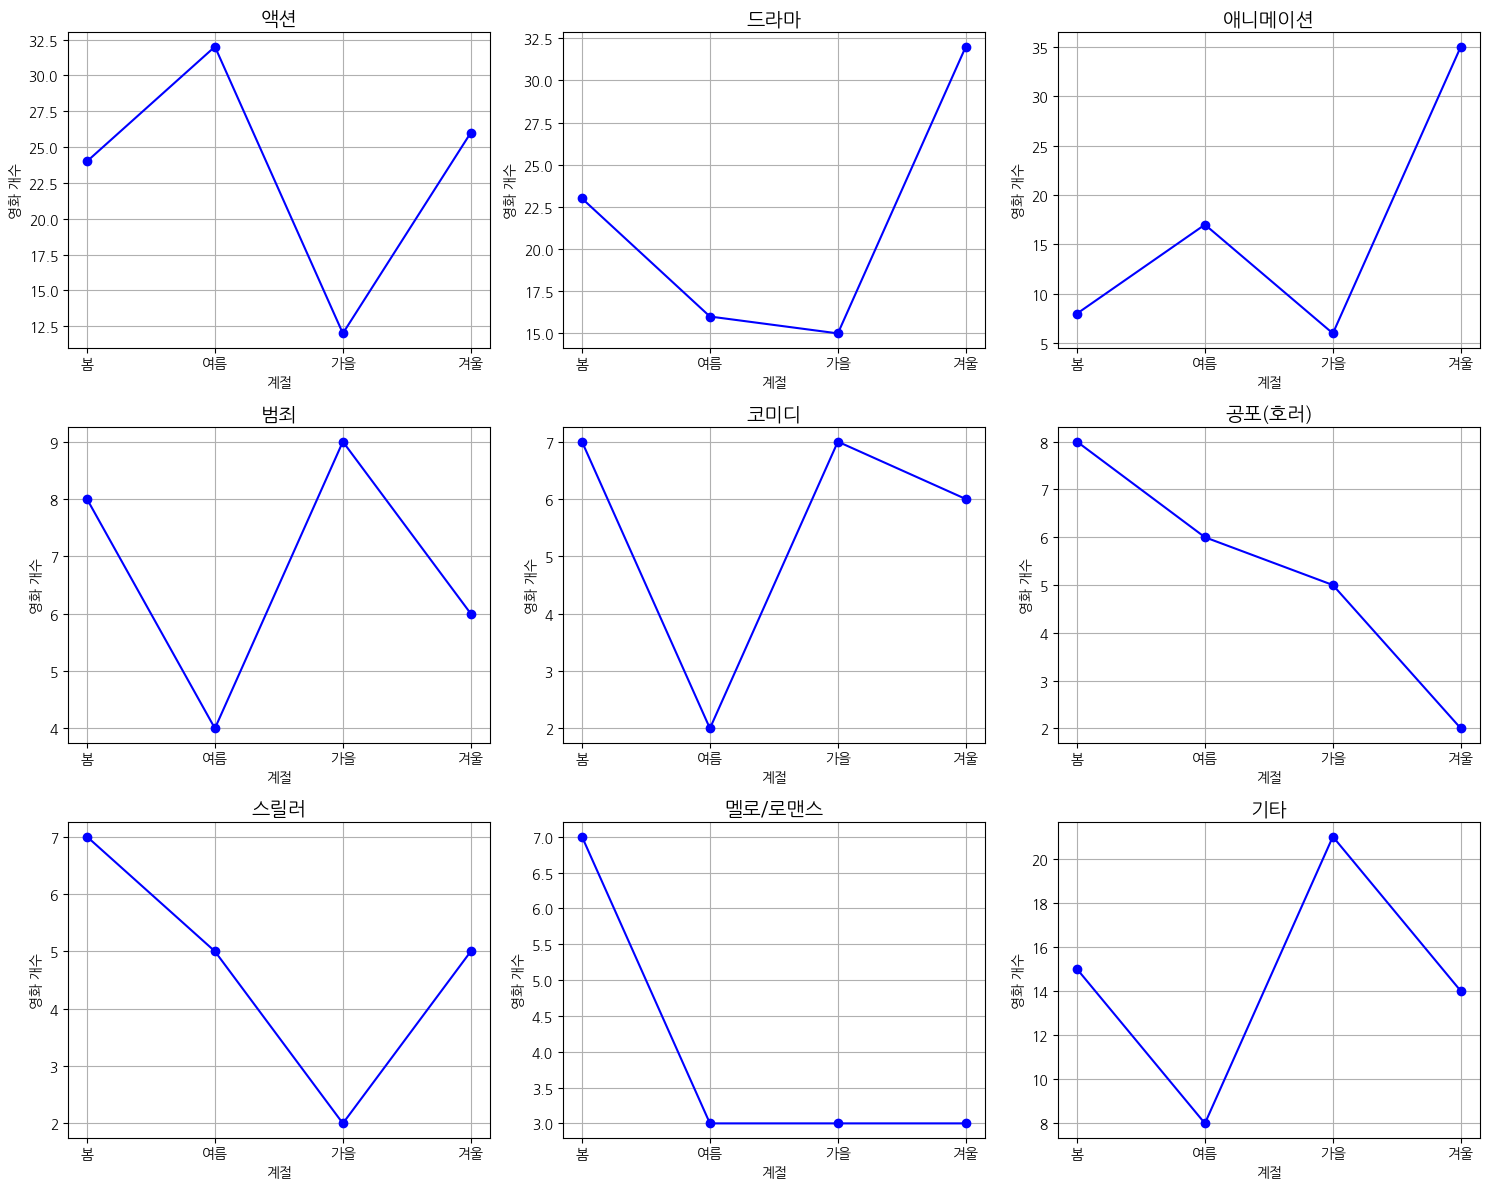

In [ ]:
import matplotlib.pyplot as plt

# 계절별 장르별 영화 개수 계산
season_genre_count = df_0.groupby(['season', 'first_genre'])['movie_title'].nunique().unstack(fill_value=0)

seasons_order = ['봄', '여름', '가을', '겨울']
season_genre_count = season_genre_count.loc[seasons_order, genres]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for ax, genre in zip(axes, genres):
    # 해당 장르에 대한 계절별 영화 개수 데이터
    y_values = season_genre_count[genre]
    
    ax.plot(seasons_order, y_values, marker='o', color='blue', label=genre)
    ax.set_title(f'{genre}', fontsize=14)
    ax.set_xlabel('계절')
    ax.set_ylabel('영화 개수')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [17]:
# MoY를 숫자로 변환
df_0['MoY_num'] = df_0['MoY'].str.lower().map(month_map)

# 계절 컬럼 추가
df_0['season'] = df_0['MoY_num'].apply(get_season)

# 계절별, 장르별 관객수 합 계산
season_genre_sum = df_0.groupby(['season', 'first_genre'])['관객수'].transform('sum')

# 새로운 컬럼으로 추가
df_0['season_genre_audience_sum'] = season_genre_sum

In [18]:
df_0['season_genre_audience_sum']

0        204086
15      1488136
30      1488136
45       204086
60      1076956
         ...   
6060    8930818
6075    1268450
6090     504363
6105    8930818
6120     313257
Name: season_genre_audience_sum, Length: 409, dtype: int64

In [19]:
# season이 겨울이고 스릴러인 경우만 추출
winter_thriller = df_0[(df_0['season'] == '겨울') & (df_0['first_genre'] == '스릴러')]
print(winter_thriller)



      naver_movie_code  kobis_movie_code movie_title release_date DoW_release  \
1635            149777          20168381        얼라이드   2017-01-11   Wednesday   
1980            144927          20170241    23 아이덴티티   2017-02-22   Wednesday   
3795            151744          20180341      레드 스패로   2018-02-28   Wednesday   
5010            171755          20179230         도어락   2018-12-05   Wednesday   
5055            171452          20182082  부탁 하나만 들어줘   2018-12-12   Wednesday   

            Date        DoW       MoY  D_D  DailyTotal  ...  등급평균스크린수  \
1635  2017-01-11  Wednesday   January    0         179  ...        79   
1980  2017-02-22  Wednesday  February    0         868  ...        79   
3795  2018-02-28  Wednesday  February    0         191  ...        43   
5010  2018-12-05  Wednesday  December    0         574  ...        79   
5055  2018-12-12  Wednesday  December    0          68  ...        43   

      7days_before  5days_before  Day_of_release  5days_after  7days_after

### 데이터 수집: 예고편 조회수 추가

In [20]:
teaser = pd.read_excel("./trailer_data/예고편 영상 데이터.xlsx")

In [21]:
# df_0랑 teaser 합치기
merged_df = pd.merge(df_0, teaser[['movie_title', 'view_count']], on='movie_title', how='left')

# 결과 확인
print(merged_df.head())

   naver_movie_code  kobis_movie_code                     movie_title  \
0            107374          20142641                       나를 잊지 말아요   
1            137281          20150024  짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격   
2            109910          20155422                           굿 다이노   
3             62285          20068576                         그날의 분위기   
4            124212          20154001                레버넌트: 죽음에서 돌아온 자   

  release_date DoW_release        Date       DoW      MoY  D_D  DailyTotal  \
0   2016-01-07    Thursday  2016-01-07  Thursday  January    0         612   
1   2016-01-07    Thursday  2016-01-07  Thursday  January    0          65   
2   2016-01-07    Thursday  2016-01-07  Thursday  January    0         280   
3   2016-01-14    Thursday  2016-01-14  Thursday  January    0         297   
4   2016-01-14    Thursday  2016-01-14  Thursday  January    0         613   

   ...  7days_before  5days_before  Day_of_release  5days_after  7days_after  \
0  ...      

In [22]:
import holidays

# 대한민국 공휴일 객체 생성 (2016년 ~ 2019년)
kr_holidays = holidays.KR(years=range(2016, 2020))

# Date 열을 datetime 형식으로 변환
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# 공휴일 여부 확인 및 Holiday 열 생성
merged_df['Holiday'] = merged_df['Date'].apply(lambda x: 1 if x in kr_holidays else 0)

# Weekend 열 생성: 토요일(Saturday)이나 일요일(Sunday)면 1, 아니면 0
merged_df['Weekend'] = merged_df['DoW'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Vacation 열 생성: 월이 1, 2, 7, 8이면 1, 아니면 0
merged_df['Vacation'] = merged_df['Date'].dt.month.apply(lambda x: 1 if x in [1, 2, 7, 8] else 0)

# 결과 확인
print(merged_df.head())


   naver_movie_code  kobis_movie_code                     movie_title  \
0            107374          20142641                       나를 잊지 말아요   
1            137281          20150024  짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격   
2            109910          20155422                           굿 다이노   
3             62285          20068576                         그날의 분위기   
4            124212          20154001                레버넌트: 죽음에서 돌아온 자   

  release_date DoW_release       Date       DoW      MoY  D_D  DailyTotal  \
0   2016-01-07    Thursday 2016-01-07  Thursday  January    0         612   
1   2016-01-07    Thursday 2016-01-07  Thursday  January    0          65   
2   2016-01-07    Thursday 2016-01-07  Thursday  January    0         280   
3   2016-01-14    Thursday 2016-01-14  Thursday  January    0         297   
4   2016-01-14    Thursday 2016-01-14  Thursday  January    0         613   

   ...  5days_after  7days_after  first_genre  MoY_num  season  \
0  ...            6           33

In [23]:
merged_df['release_date']

0      2016-01-07
1      2016-01-07
2      2016-01-07
3      2016-01-14
4      2016-01-14
          ...    
404    2019-06-19
405    2019-06-20
406    2019-06-26
407    2019-06-26
408    2019-06-26
Name: release_date, Length: 409, dtype: object

### '경쟁 영화 파워' 파생 변수 추가

In [24]:
# release_date 열을 datetime 형식으로 변환
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# D_D 기준으로 3일 전 내에 개봉한 영화 리스트 생성
day = 3
column_name = f"list_movies_released_{day}_days_before"  # 컬럼 이름 생성

# 함수 정의: 주어진 날짜 기준으로 'day'일 전부터 현재까지 개봉한 영화 리스트 반환
def get_recent_movies(row, df, day):
    if pd.isnull(row['Date']):
        return []
    start_date = row['Date'] - pd.Timedelta(days=day)
    end_date = row['Date']
    recent_movies = df[
        (df['release_date'] >= start_date) &
        (df['release_date'] <= end_date)
    ]['movie_title'].drop_duplicates().tolist()
    return recent_movies

# 새로운 컬럼 추가
merged_df[column_name] = merged_df.apply(get_recent_movies, axis=1, args=(merged_df, day))

# 결과 확인
print(f"\n'{column_name}' 컬럼 추가 후 데이터프레임의 첫 5개 행:")
print(merged_df.head())


'list_movies_released_3_days_before' 컬럼 추가 후 데이터프레임의 첫 5개 행:
   naver_movie_code  kobis_movie_code                     movie_title  \
0            107374          20142641                       나를 잊지 말아요   
1            137281          20150024  짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격   
2            109910          20155422                           굿 다이노   
3             62285          20068576                         그날의 분위기   
4            124212          20154001                레버넌트: 죽음에서 돌아온 자   

  release_date DoW_release       Date       DoW      MoY  D_D  DailyTotal  \
0   2016-01-07    Thursday 2016-01-07  Thursday  January    0         612   
1   2016-01-07    Thursday 2016-01-07  Thursday  January    0          65   
2   2016-01-07    Thursday 2016-01-07  Thursday  January    0         280   
3   2016-01-14    Thursday 2016-01-14  Thursday  January    0         297   
4   2016-01-14    Thursday 2016-01-14  Thursday  January    0         613   

   ...  7days_after  first_genre  Mo

In [25]:
merged_df['list_movies_released_3_days_before']

0      [나를 잊지 말아요, 짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격, 굿 ...
1      [나를 잊지 말아요, 짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격, 굿 ...
2      [나를 잊지 말아요, 짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격, 굿 ...
3                      [그날의 분위기, 레버넌트: 죽음에서 돌아온 자, 구스범스]
4                      [그날의 분위기, 레버넌트: 죽음에서 돌아온 자, 구스범스]
                             ...                        
404                                    [롱 리브 더 킹: 목포 영웅]
405                          [롱 리브 더 킹: 목포 영웅, 토이 스토리 4]
406                          [비스트, 존 윅 3: 파라벨룸, 애나벨 집으로]
407                          [비스트, 존 윅 3: 파라벨룸, 애나벨 집으로]
408                          [비스트, 존 윅 3: 파라벨룸, 애나벨 집으로]
Name: list_movies_released_3_days_before, Length: 409, dtype: object

In [ ]:
## hit_movies 필터링 & count
def calculate_movie_power_and_list(row, df):
    # 1. 3_before_movie_list에서 영화 리스트를 가져옴
    movie_list = row["list_movies_released_3_days_before"]

    # 2. 해당 영화 리스트의 영화들을 'movie_title'에서 필터링
    relevant_rows = df[
        (df["movie_title"].isin(movie_list)) &  # 영화 제목이 리스트에 있고
        (df["D_D"] == 0)                       # D_D 값이 0인 경우
    ]

    # 3. 관객수가 30만이 넘는 영화 필터링
    powerful_movies = relevant_rows[relevant_rows["관객수"] >= 300000]["movie_title"].tolist()

    # 4. movie_power 계산 (30만 넘는 영화 개수)
    movie_power = len(powerful_movies)  # 30만 넘는 영화의 개수

    return movie_power, powerful_movies

# movie_power와 movie_power_list 컬럼 추가
merged_df[["hit_movie_power", "hit_movie_list"]] = merged_df.apply(
    lambda row: pd.Series(calculate_movie_power_and_list(row, merged_df)), axis=1
)

print(merged_df[["movie_title", "hit_movie_power", "hit_movie_list"]].head(50))

                       movie_title  hit_movie_power hit_movie_list
0                        나를 잊지 말아요                0             []
1   짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격                0             []
2                            굿 다이노                0             []
3                          그날의 분위기                0             []
4                 레버넌트: 죽음에서 돌아온 자                0             []
5                             구스범스                0             []
6                              빅쇼트                0             []
7                           로봇, 소리                0             []
8                            쿵푸팬더3                0             []
9                             검사외전                1         [검사외전]
10                              캐롤                1         [검사외전]
11               앨빈과 슈퍼밴드: 악동 어드벤처                1         [검사외전]
12                            좋아해줘                0             []
13                             데드풀                0           

조회수와 관객수의 scatter plot

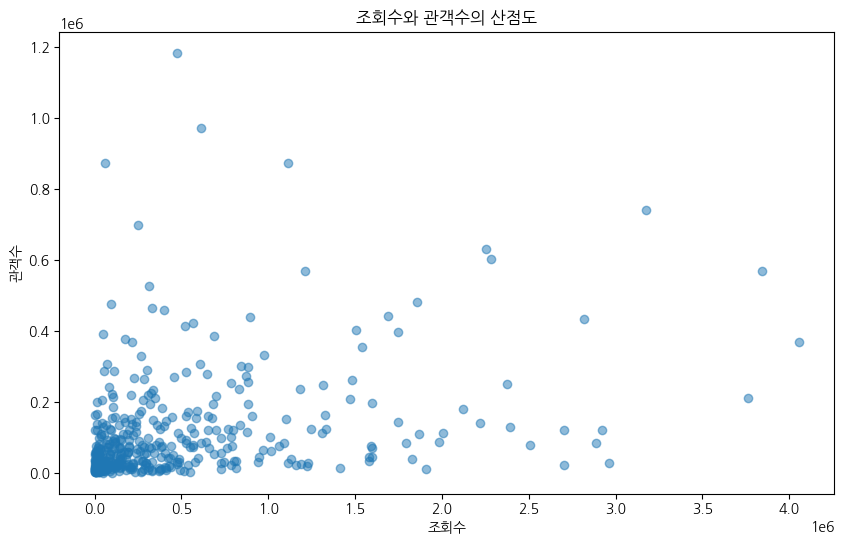

In [27]:
# D_D가 0인 데이터 추출
dd_zero_df = merged_df
# dd_zero_df의 view_count 값과 관객수의 scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dd_zero_df['view_count'], dd_zero_df['관객수'], alpha=0.5)
plt.xlabel('조회수')
plt.ylabel('관객수')
plt.title('조회수와 관객수의 산점도')
plt.show()

In [28]:
# view_count와 관객수의 상관계수   
corr = dd_zero_df[['view_count', '관객수']].corr()
print(corr)


            view_count      관객수
view_count     1.00000  0.33863
관객수            0.33863  1.00000


# Model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

dd_zero_df['nationality_encoded'] = dd_zero_df['nationality'].apply(lambda x: 0 if x == '한국' else 1)


# 독립변수와 타겟 변수 정의
features = ['감독군', 'hit_movie_power','view_count','actor_power', 'season_genre_audience_sum', 'running_time', '배급사군','Holiday', 'nationality_encoded', 'Vacation','Weekend']
target = '관객수'

# 데이터 분리
X = dd_zero_df[features]
y = dd_zero_df[target]

# 결측치 처리 (단순 삭제)
X = X.dropna()
y = y.loc[X.index]

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 여러 모델 정의
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R^2': r2}

# 결과 출력
for name, metrics in results.items():
    print(f"{name} - MAE: {metrics['MAE']:.2f}, R^2: {metrics['R^2']:.2f}")


RandomForest - MAE: 61351.06, R^2: 0.58
GradientBoosting - MAE: 57834.57, R^2: 0.65
LinearRegression - MAE: 63290.96, R^2: 0.68


c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\yoon0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


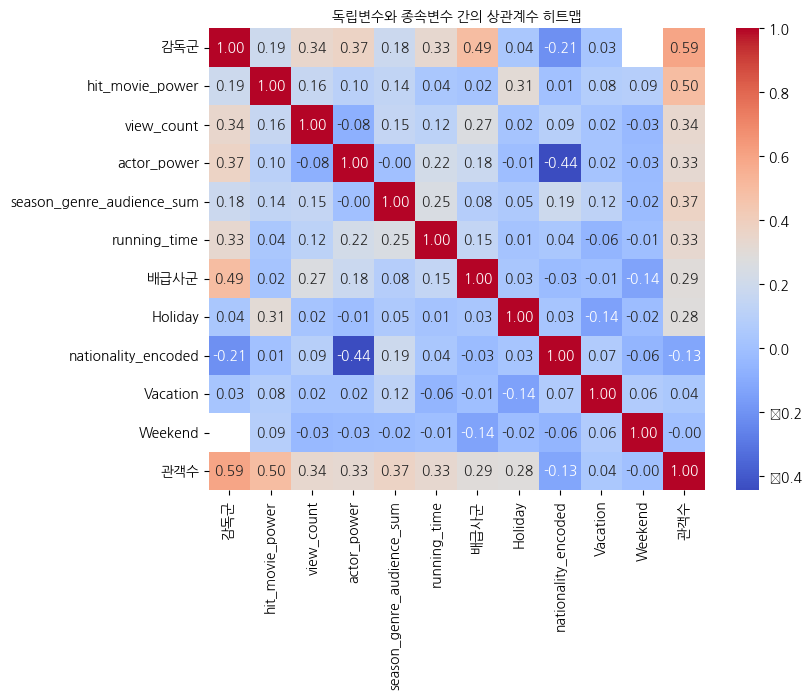

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산 (독립변수 + 종속변수)
correlation_matrix = dd_zero_df[features + [target]].corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("독립변수와 종속변수 간의 상관계수 히트맵",fontproperties=fontprop)
plt.show()


영화별로 실제 값과 예측 값을 그래프로 시각화하여 편차가 큰 영화에 대해서도 예측을 잘 하는지 테스트

RandomForest - MAE: 60706.55, R^2: 0.58
GradientBoosting - MAE: 57755.20, R^2: 0.64
LinearRegression - MAE: 63290.96, R^2: 0.68


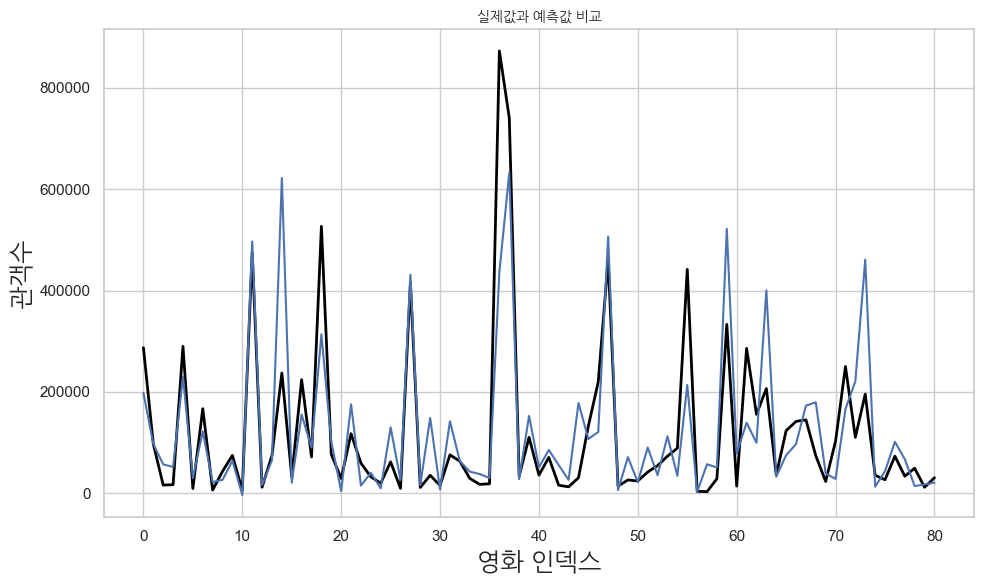

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# D_D가 0인 데이터 추출
dd_zero_df = merged_df

# 독립변수와 타겟 변수 정의,'
features = ['감독군', 'actor_power', 'season_genre_audience_sum', '배급사군', 'running_time', 'view_count', 'Holiday', 'Weekend', 'Vacation','hit_movie_power','nationality_encoded']
target = '관객수'

# 데이터 분리
X = dd_zero_df[features]
y = dd_zero_df[target]

# 결측치 처리 (단순 삭제)
X = X.dropna()
y = y.loc[X.index]

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 모델 학습 및 평가
results = {}
predictions = pd.DataFrame({'Actual': y_test})

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R^2': r2}
    predictions[name] = y_pred  # 예측값 저장

# 결과 출력
for name, metrics in results.items():
    print(f"{name} - MAE: {metrics['MAE']:.2f}, R^2: {metrics['R^2']:.2f}")

# 시각화: 실제값 vs 모델별 예측값
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 모델별 선 그래프 플롯
for name in ['GradientBoosting']:
    plt.plot(predictions['Actual'].reset_index(drop=True), label='실제값', color='black', linewidth=2)
    plt.plot(predictions[name].reset_index(drop=True), label='예측값', linewidth=1.5)

plt.xlabel('영화 인덱스', fontsize=18,fontproperties=fontprop)
plt.ylabel('관객수', fontsize=18,fontproperties=fontprop)
plt.title('실제값과 예측값 비교', fontsize=25,fontproperties=fontprop)
# 범례에 fontproperties=fontprop 넣고 싶어

# 범례 크기 키움    
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

# 모델 학습 및 평가
results = {}
predictions = pd.DataFrame({'Actual': y_test})

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE 계산
    mape = (abs((y_test - y_pred) / y_test).mean()) * 100  # MAPE 계산
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R^2': r2}
    predictions[name] = y_pred  # 예측값 저장

# 결과 출력
for name, metrics in results.items():
    print(f"{name} - MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}, MAPE: {metrics['MAPE']:.2f}%, R^2: {metrics['R^2']:.2f}")


RandomForest - MAE: 60706.55, RMSE: 105456.89, MAPE: 88.14%, R^2: 0.58
GradientBoosting - MAE: 57755.20, RMSE: 97450.34, MAPE: 99.67%, R^2: 0.64
LinearRegression - MAE: 63290.96, RMSE: 92929.17, MAPE: 180.36%, R^2: 0.68


c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


시각화: 실제값 vs 모델별 예측값 (Scatter Plot)


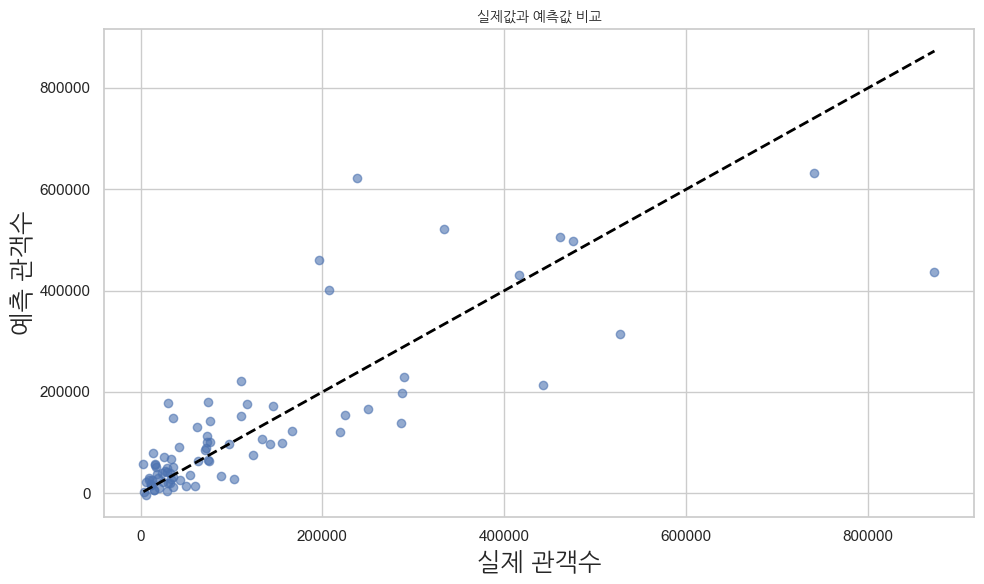

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 모델별 스캐터 플롯
for name in ['GradientBoosting']:
    plt.scatter(predictions['Actual'], predictions[name], label='예측값', alpha=0.6)

# 대각선 추가 (완벽한 예측선을 시각화)
plt.plot([predictions['Actual'].min(), predictions['Actual'].max()],
         [predictions['Actual'].min(), predictions['Actual'].max()],
         color='black', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('실제 관객수', fontsize=18, fontproperties=fontprop)
plt.ylabel('예측 관객수', fontsize=18, fontproperties=fontprop)
plt.title('실제값과 예측값 비교', fontsize=25, fontproperties=fontprop)

# plt.legend(fontsize=20, prop={'family': 'Malgun Gothic'})  # 범례에 fontproperties 반영
plt.tight_layout()
plt.show()


 모델의 train set과 test set의 MAE, RMSE, MAPE, R^2을 비교하여 overfiting이 있는지 확인

c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yoon0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

모델 성능 지표 (트레인 셋 vs 테스트 셋):

              Model     MAE_Train    RMSE_Train  MAPE_Train  R^2_Train  \
0  LinearRegression  59583.656255  92370.308902  189.823290   0.598073   
1      RandomForest  17689.594923  33007.254598   29.978624   0.948678   
2  GradientBoosting  20889.962051  28785.132329   47.589819   0.960968   

       MAE_Test      RMSE_Test   MAPE_Test  R^2_Test  
0  63290.959535   92929.169670  180.360300  0.675923  
1  60706.550988  105456.885929   88.138778  0.582656  
2  57755.196210   97450.337641   99.671517  0.643622  


C:\Users\yoon0\AppData\Local\Temp\ipykernel_14500\2844795160.py:81: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yoon0\AppData\Local\Temp\ipykernel_14500\2844795160.py:81: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yoon0\AppData\Local\Temp\ipykernel_14500\2844795160.py:81: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yoon0\AppData\Local\Temp\ipykernel_14500\2844795160.py:81: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yoon0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yoon0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 5106

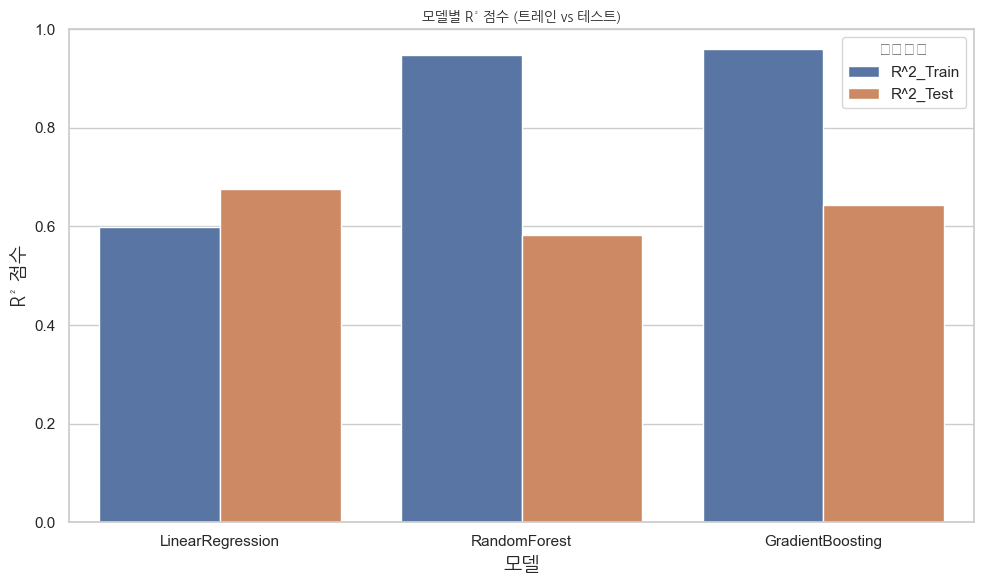

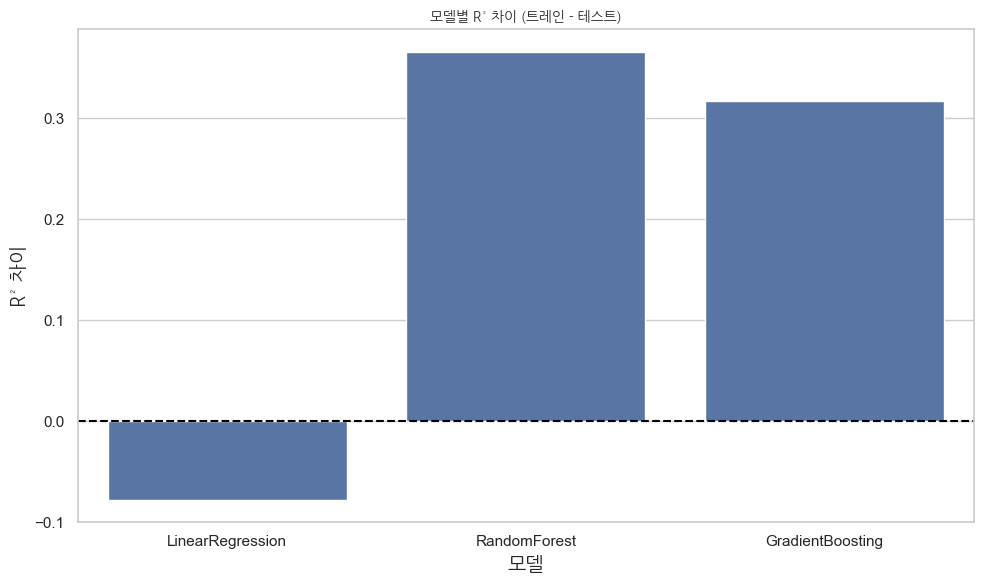

In [37]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모델 초기화 (예시)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=42)
model3 = GradientBoostingRegressor(random_state=42)

models = {
    'LinearRegression': model1,
    'RandomForest': model2,
    'GradientBoosting': model3
}

# 모델 학습 및 평가
results = []  # 리스트로 변경
predictions_train = pd.DataFrame({'Actual': y_train})
predictions_test = pd.DataFrame({'Actual': y_test})

for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 트레인 셋 예측
    y_train_pred = model.predict(X_train)
    predictions_train[name] = y_train_pred
    
    # 테스트 셋 예측
    y_test_pred = model.predict(X_test)
    predictions_test[name] = y_test_pred
    
    # 지표 계산 (트레인 셋)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mape_train = (abs((y_train - y_train_pred) / y_train).mean()) * 100 if not any(y_train == 0) else np.nan
    r2_train = r2_score(y_train, y_train_pred)
    
    # 지표 계산 (테스트 셋)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mape_test = (abs((y_test - y_test_pred) / y_test).mean()) * 100 if not any(y_test == 0) else np.nan
    r2_test = r2_score(y_test, y_test_pred)
    
    # 결과 저장
    results.append({
        'Model': name,
        'MAE_Train': mae_train,
        'RMSE_Train': rmse_train,
        'MAPE_Train': mape_train,
        'R^2_Train': r2_train,
        'MAE_Test': mae_test,
        'RMSE_Test': rmse_test,
        'MAPE_Test': mape_test,
        'R^2_Test': r2_test
    })

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print("모델 성능 지표 (트레인 셋 vs 테스트 셋):\n")
print(results_df[['Model', 'MAE_Train', 'RMSE_Train', 'MAPE_Train', 'R^2_Train',
                  'MAE_Test', 'RMSE_Test', 'MAPE_Test', 'R^2_Test']])

# 시각화: R² 비교
plt.figure(figsize=(10, 6))
r2_melt = pd.melt(results_df, id_vars='Model', value_vars=['R^2_Train', 'R^2_Test'],
                 var_name='Dataset', value_name='R^2 Score')
sns.barplot(x='Model', y='R^2 Score', hue='Dataset', data=r2_melt)
plt.title('모델별 R² 점수 (트레인 vs 테스트)', fontsize=16,fontproperties=fontprop)
plt.ylabel('R² 점수', fontsize=14,fontproperties=fontprop)
plt.xlabel('모델', fontsize=14,fontproperties=fontprop)
plt.ylim(0, 1)
plt.legend(title='데이터셋')
plt.tight_layout()
plt.show()

# 시각화: 트레인과 테스트 셋의 R² 차이 확인 (과적합 판단)
results_df['R2_Difference'] = results_df['R^2_Train'] - results_df['R^2_Test']

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_Difference', data=results_df)
plt.title('모델별 R² 차이 (트레인 - 테스트)', fontsize=16,fontproperties=fontprop)
plt.ylabel('R² 차이', fontsize=14,fontproperties=fontprop)
plt.xlabel('모델', fontsize=14,fontproperties=fontprop)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


변수 중요도를 시각적으로 파악

                      Feature  Importance
0                         감독군    0.407709
9             hit_movie_power    0.273208
1                 actor_power    0.089627
4                running_time    0.065939
6                     Holiday    0.058011
2   season_genre_audience_sum    0.053724
5                  view_count    0.043522
8                    Vacation    0.003652
10        nationality_encoded    0.002831
3                        배급사군    0.001776
7                     Weekend    0.000000


C:\Users\yoon0\AppData\Local\Temp\ipykernel_14500\2145208509.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


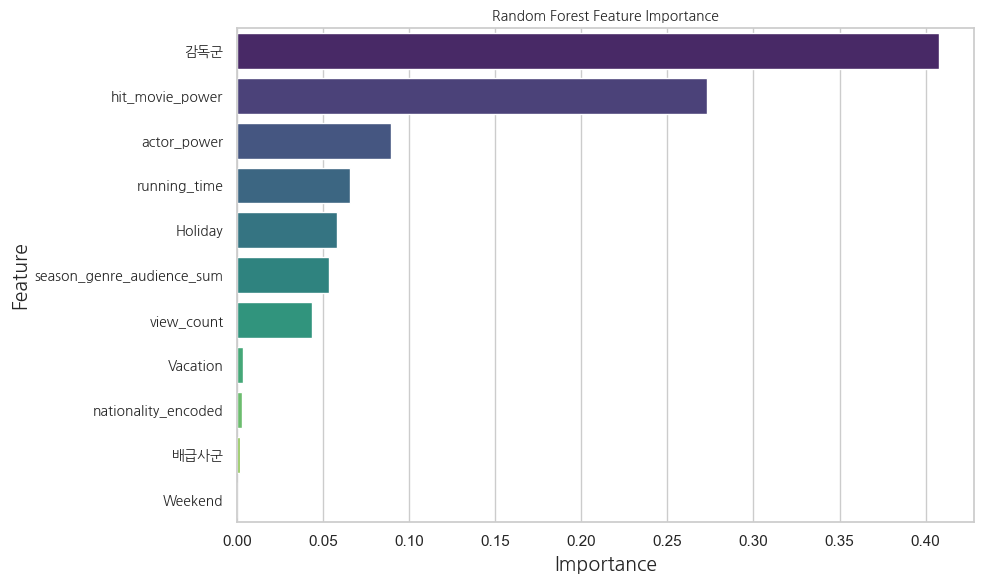

In [35]:
# RandomForest를 사용한 모델의 피쳐들 p-value 확인 
import statsmodels.api as sm
# 피처 중요도 추출
importances = models['GradientBoosting'].feature_importances_
feature_names = X_train.columns

# 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance', fontsize=16, fontproperties=fontprop)
plt.xlabel('Importance', fontsize=14,fontproperties=fontprop)
plt.ylabel('Feature', fontsize=14,fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()

In [36]:
import statsmodels.api as sm

# 상수항 추가
X_const = sm.add_constant(X)

# OLS 모델 생성 및 피팅
ols_model = sm.OLS(y, X_const)
ols_results = ols_model.fit()

# 요약 출력
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                    관객수   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     64.54
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.19e-76
Time:                        02:03:19   Log-Likelihood:                -5190.5
No. Observations:                 404   AIC:                         1.040e+04
Df Residuals:                     393   BIC:                         1.045e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 